In [40]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
from sklearn import svm
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score, classification_report

In [43]:
##Data importing & Analysis

In [44]:
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [45]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [46]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


C:\Users\mahad\AppData\Local\Temp\ipykernel_10660\1466661835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data_df["DEATH_EVENT"],palette=cols)


[Text(0, 0, '203')]

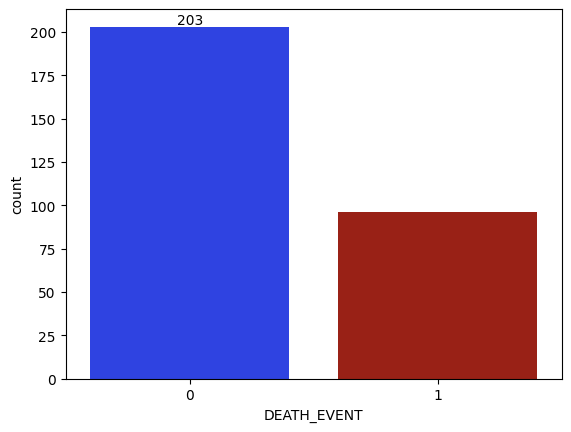

In [47]:
cols = ["#112CFF","#AF0F00"]
ax = sns.countplot(x=data_df["DEATH_EVENT"],palette=cols)
ax.bar_label(ax.containers[0])

In [48]:
data_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: >

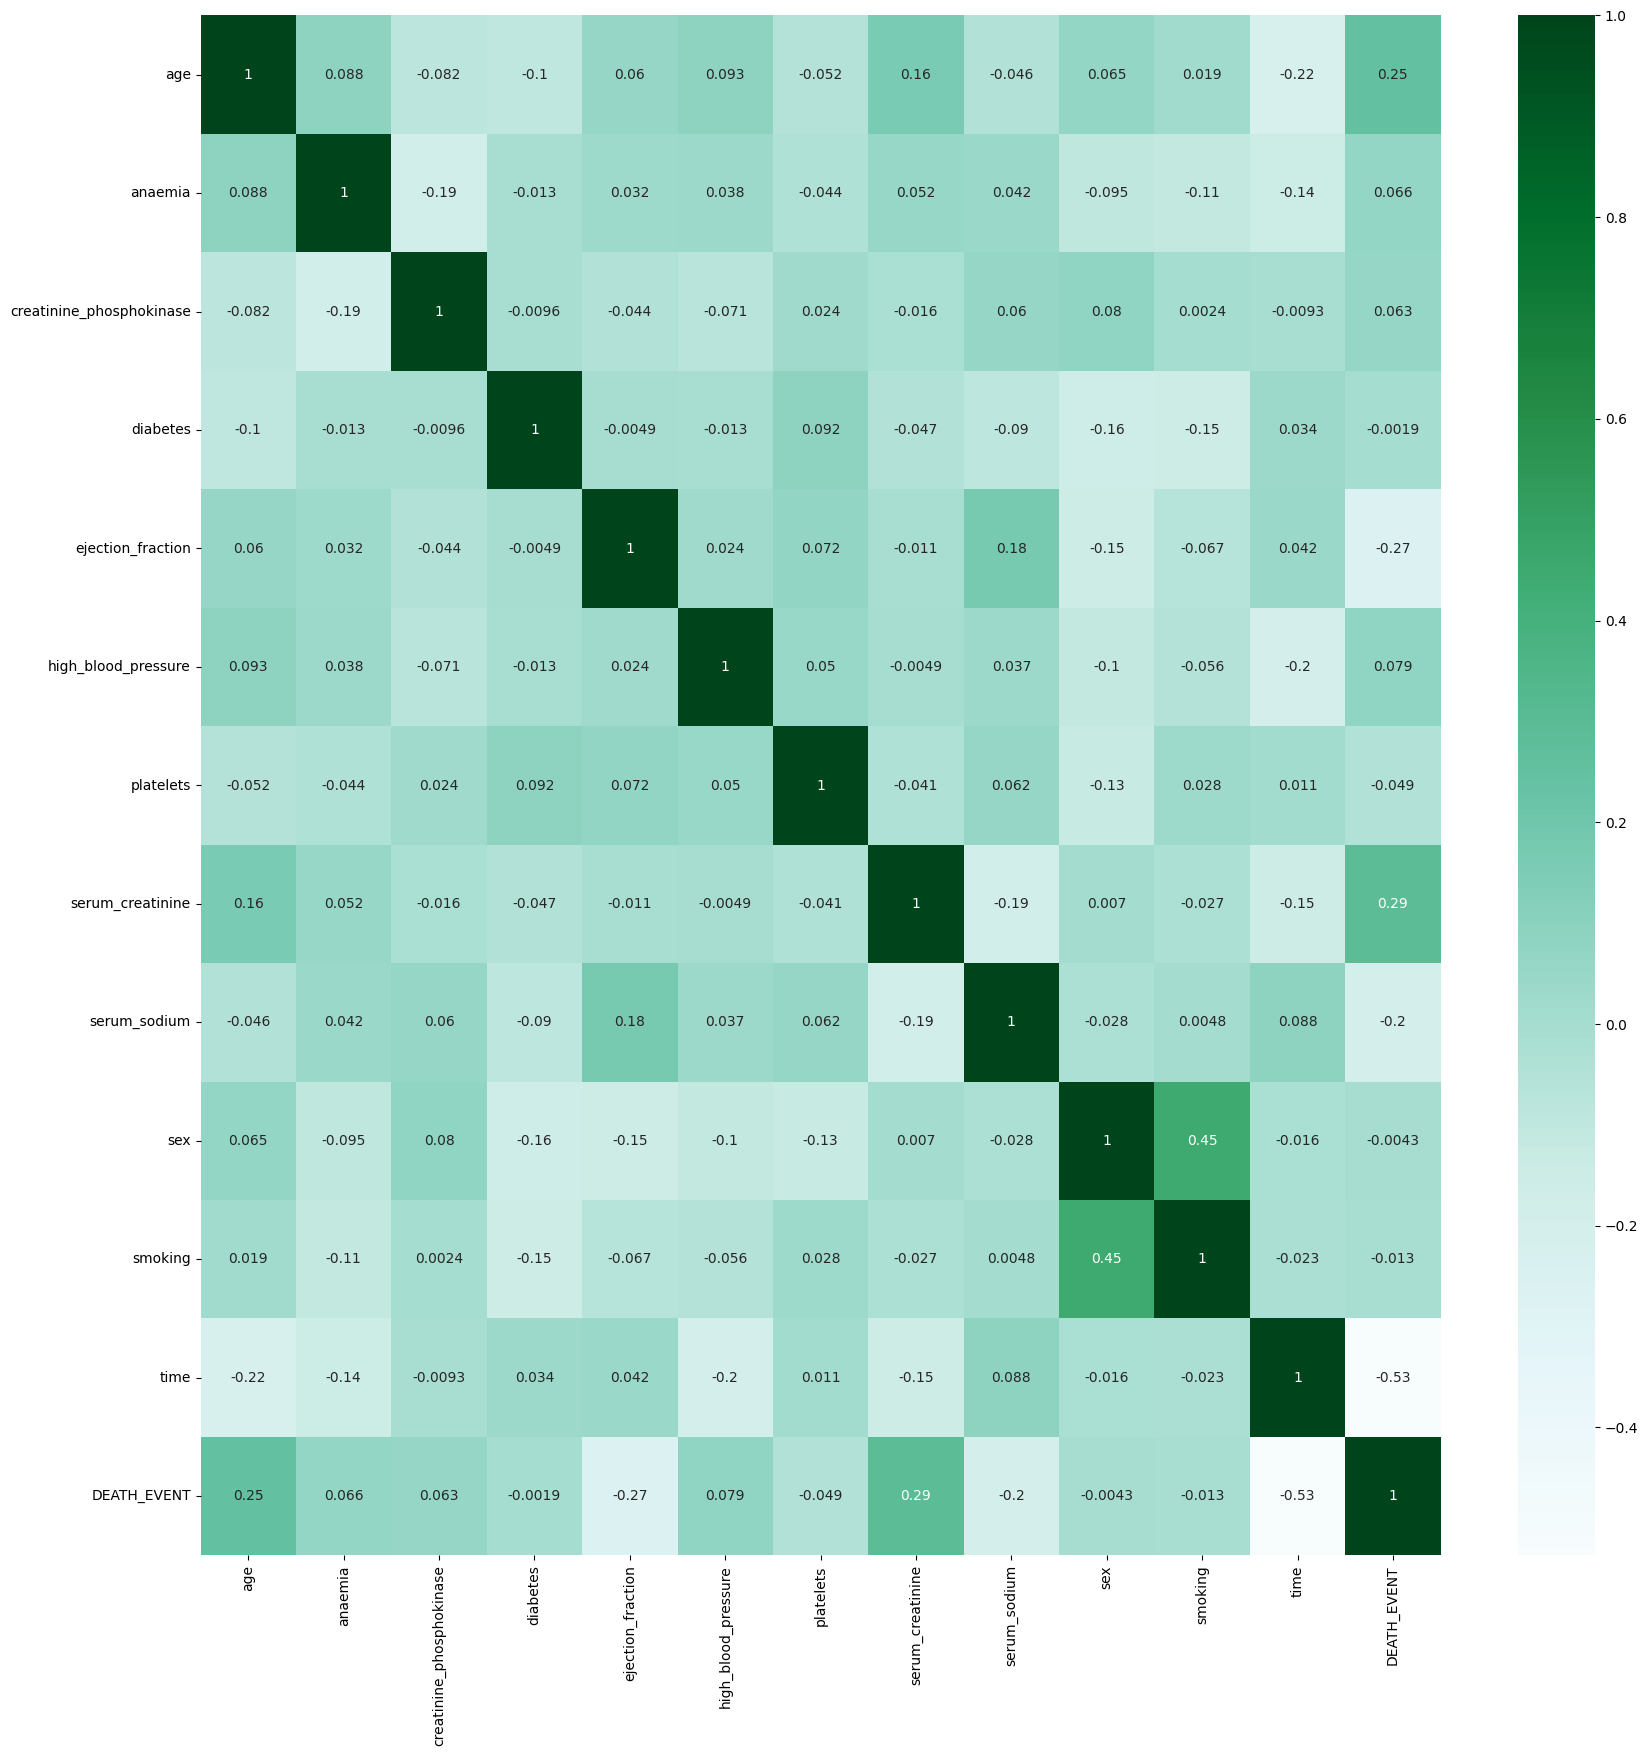

In [49]:
plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(),cmap="BuGn",annot = True)

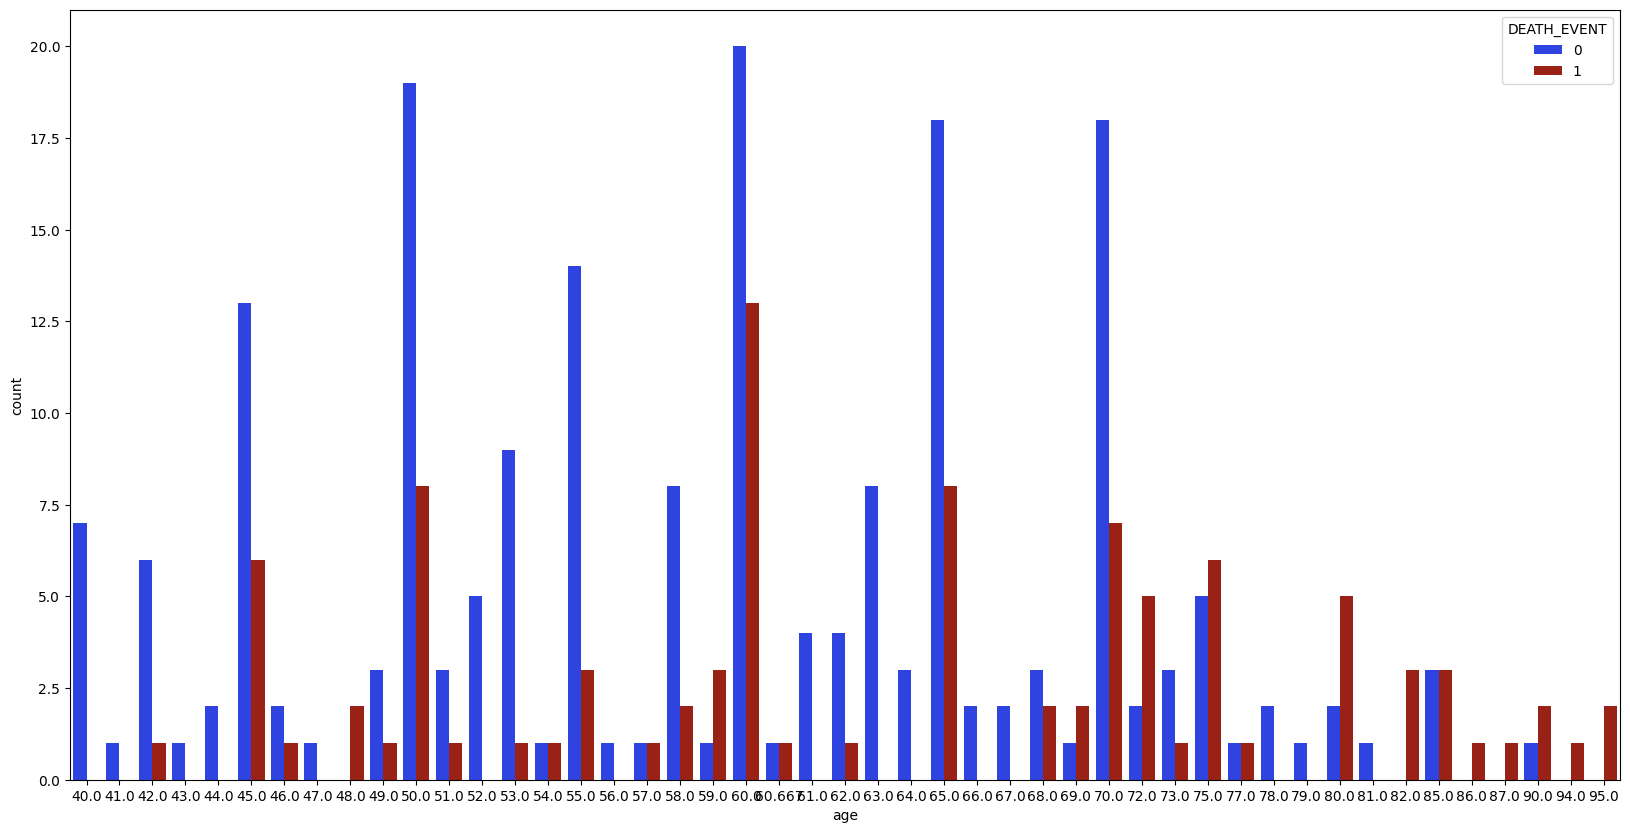

In [50]:
plt.figure(figsize=(20,10))
days_of_week = sns.countplot(x = data_df['age'],data=data_df,hue=data_df['DEATH_EVENT'],palette=cols)

C:\Users\mahad\AppData\Local\Temp\ipykernel_10660\2316310695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)


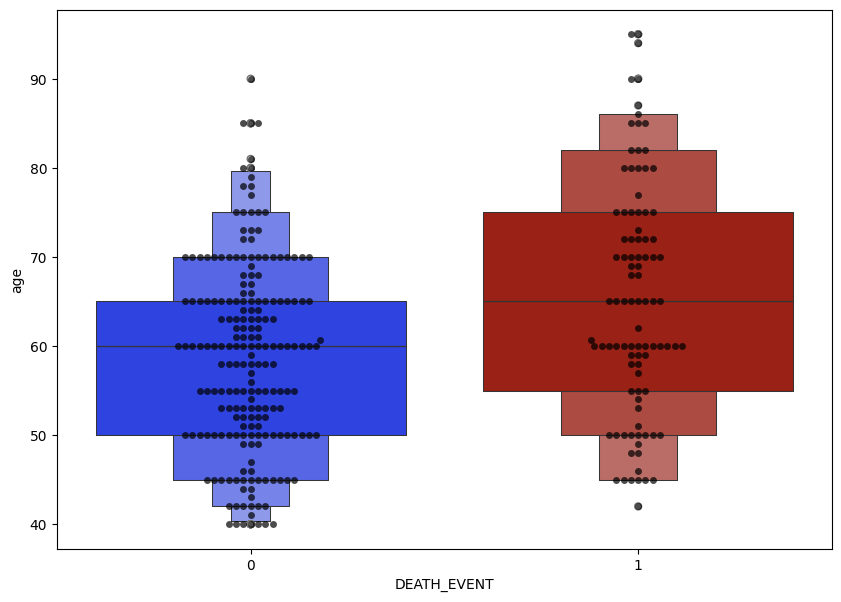

C:\Users\mahad\AppData\Local\Temp\ipykernel_10660\2316310695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)
c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


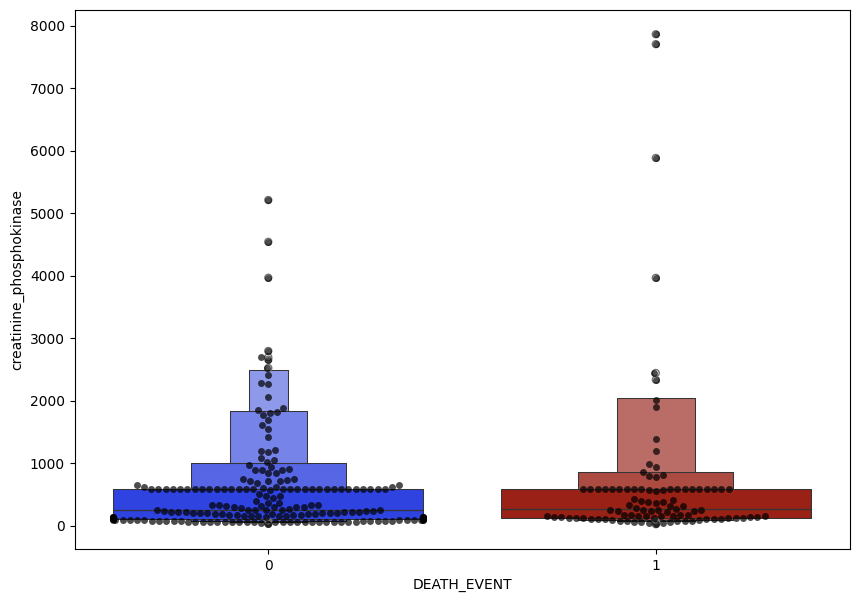

C:\Users\mahad\AppData\Local\Temp\ipykernel_10660\2316310695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)


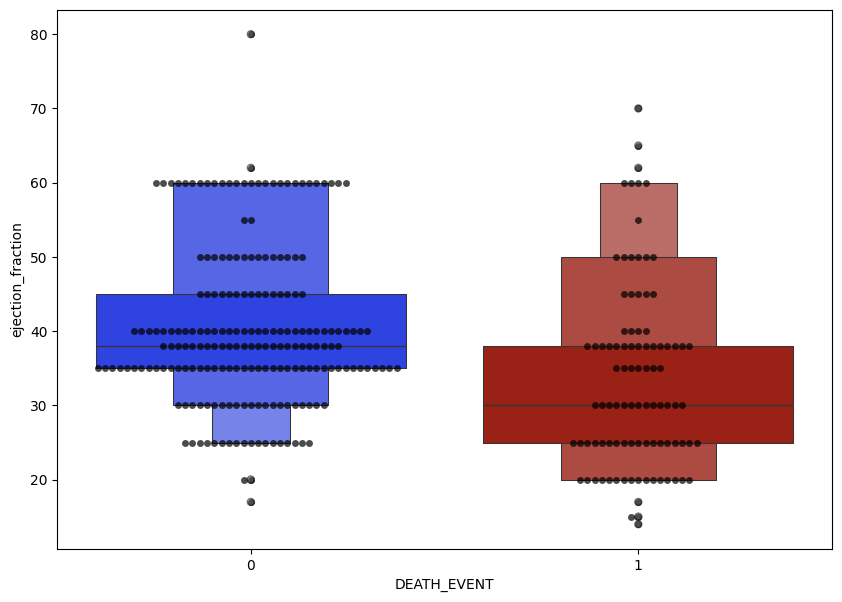

C:\Users\mahad\AppData\Local\Temp\ipykernel_10660\2316310695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)


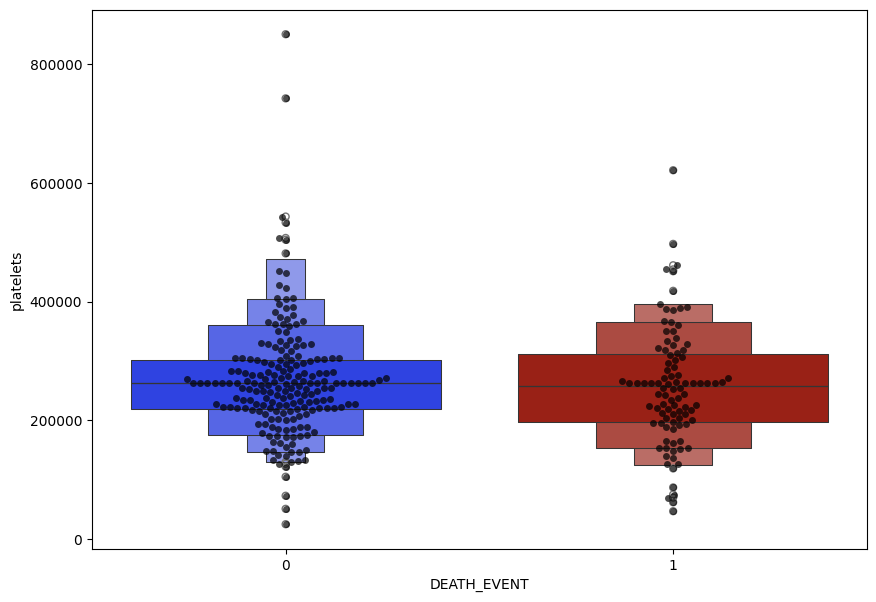

C:\Users\mahad\AppData\Local\Temp\ipykernel_10660\2316310695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)
c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


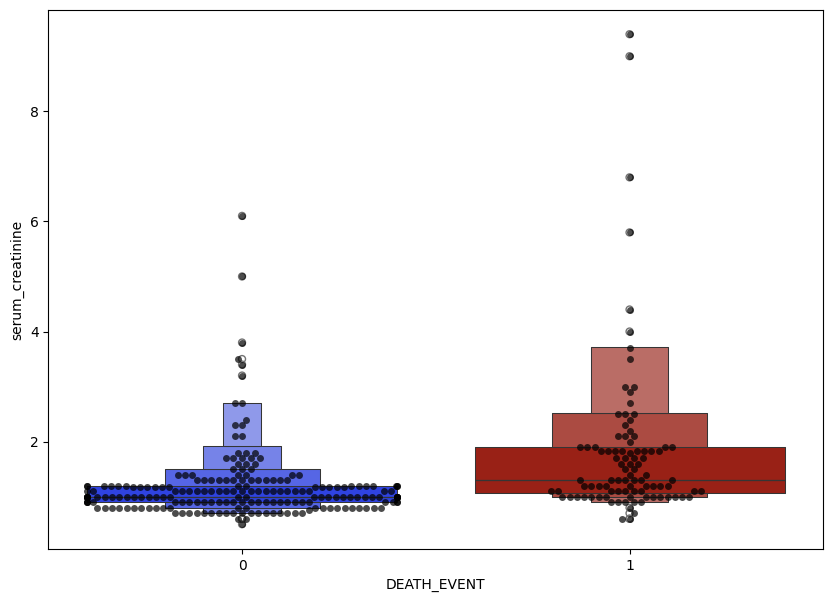

C:\Users\mahad\AppData\Local\Temp\ipykernel_10660\2316310695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)


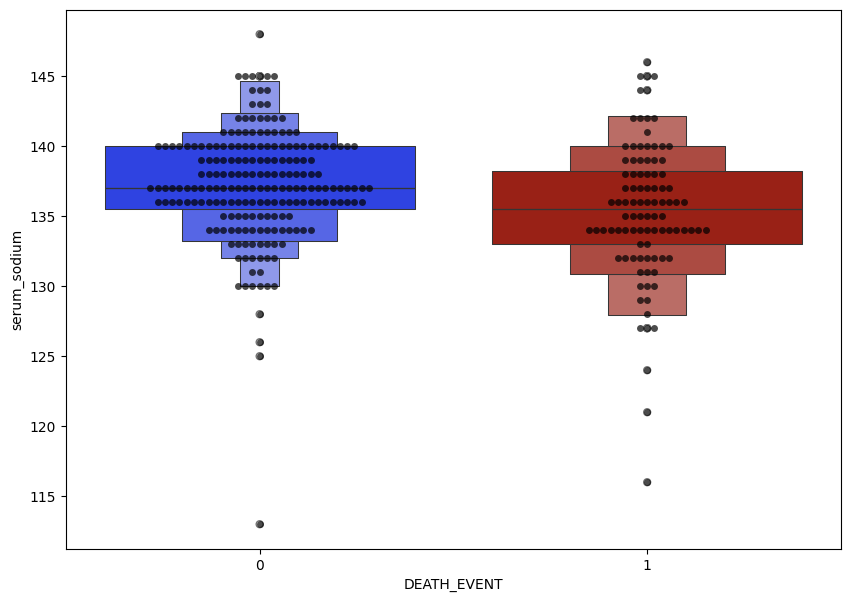

C:\Users\mahad\AppData\Local\Temp\ipykernel_10660\2316310695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)


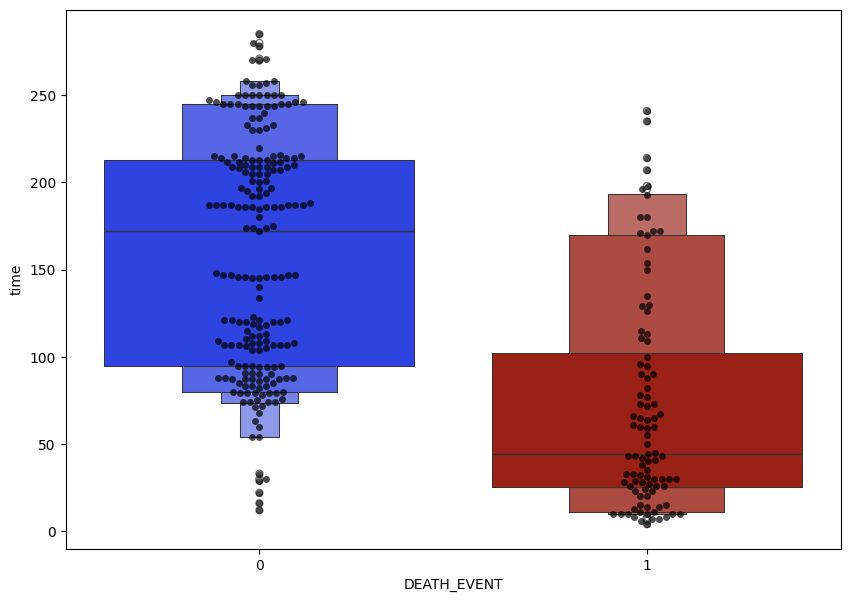

In [51]:
features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", 
            "serum_creatinine", "serum_sodium", "time"]
for i in features:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"],y=data_df[i],color="black",alpha=0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)
    plt.show()
    

In [52]:
## Data preprocessing

In [53]:
X = data_df.drop(["DEATH_EVENT"],axis=1)
Y = data_df['DEATH_EVENT']

In [54]:
col_name = list(X.columns)
S_Scaler = StandardScaler()
X_scaled = S_Scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = col_name)

In [55]:
joblib.dump(S_Scaler, 'scaler.pkl')

['scaler.pkl']

In [56]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


<Axes: >

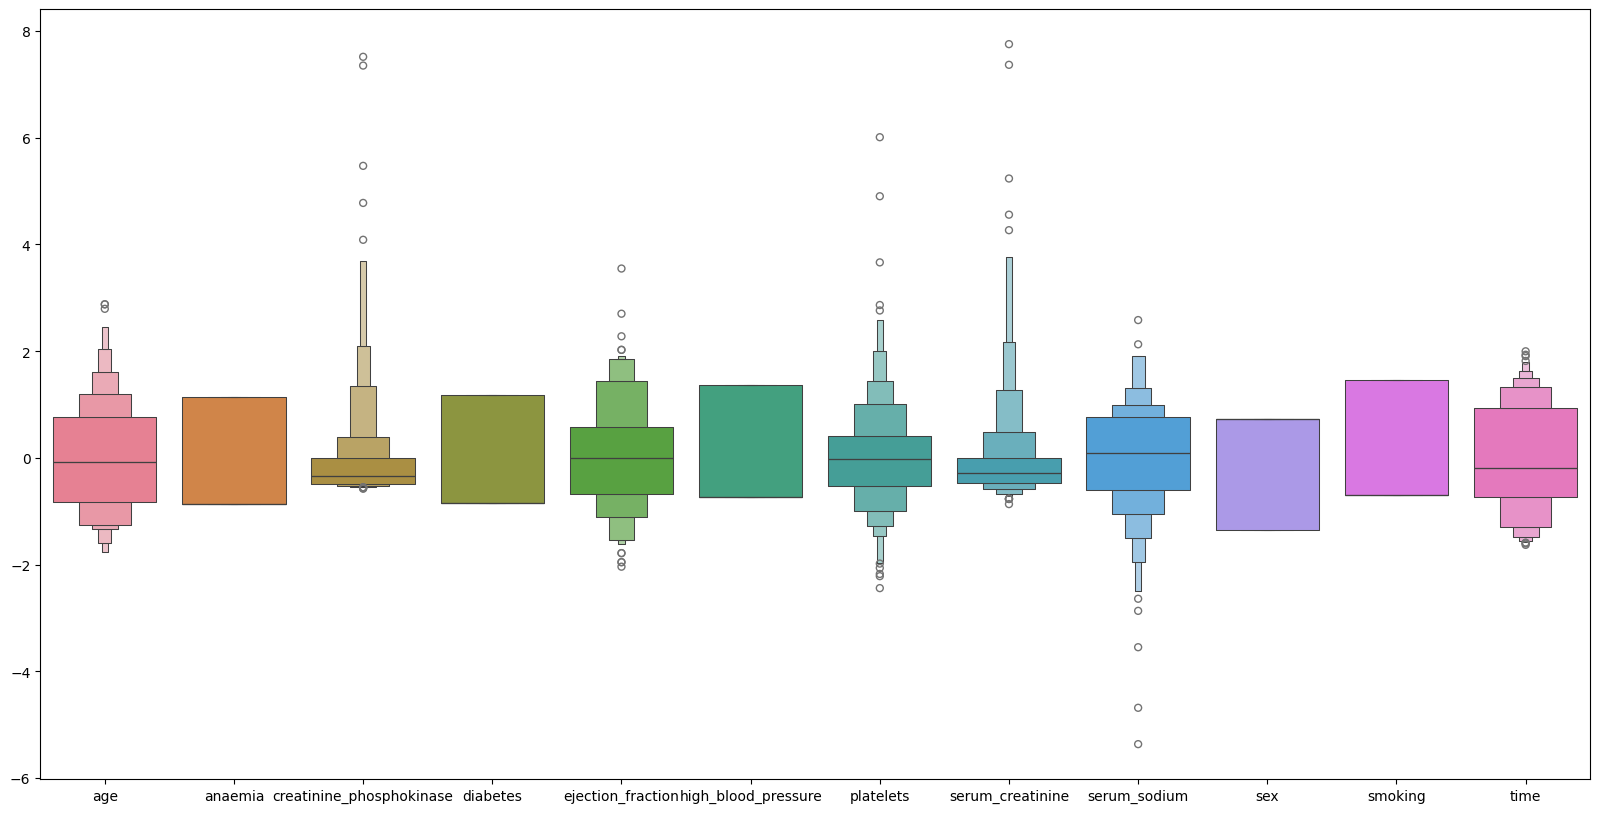

In [57]:
plt.figure(figsize = (20,10))
sns.boxenplot(data=X_scaled)

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.3,random_state=78)

## Model building

In [119]:
#SVM

In [120]:
model1 = svm.SVC()

In [121]:
model1.fit(X_train,y_train)

SVC()

In [122]:
y_pred = model1.predict(X_test)

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        62
           1       0.68      0.61      0.64        28

    accuracy                           0.79        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.78      0.79      0.79        90



In [124]:
pred = model1.predict(np.array([[72,0,127,1,50,1,218000,1,134,1,0,33]]))
pred

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [125]:
#ANN

In [126]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, patience = 20, restore_best_weights = True)
model = Sequential()

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [128]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))


In [130]:
history = model.fit(X_train,y_train.reset_index(drop=True), batch_size = 32, epochs = 100, callbacks =[early_stopping],validation_split = 0.25,class_weight=class_weights)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5468 - loss: 0.6777 - val_accuracy: 0.6604 - val_loss: 0.6928
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6670 - loss: 0.6974 - val_accuracy: 0.6604 - val_loss: 0.6928
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7013 - loss: 0.6784 - val_accuracy: 0.6604 - val_loss: 0.6927
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6466 - loss: 0.7087 - val_accuracy: 0.6604 - val_loss: 0.6927
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6614 - loss: 0.7005 - val_accuracy: 0.6604 - val_loss: 0.6927
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7005 - loss: 0.6788 - val_accuracy: 0.6604 - val_loss: 0.6926
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6818 - loss: 0.6892 - val_accuracy: 0.6604 - val_loss: 0.6925
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6701 - loss: 0.6957 - val_accuracy: 0.6604 - val_loss:

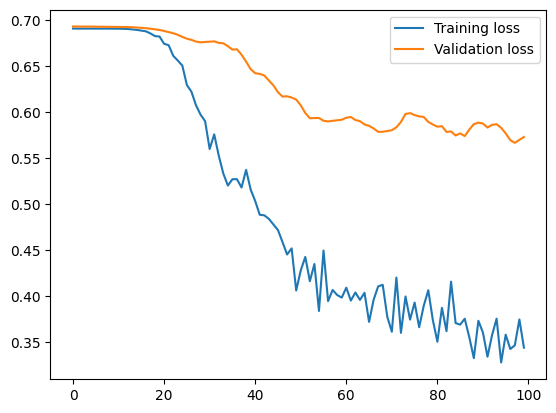

In [131]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']],label = 'Training loss')
plt.plot(history_df.loc[:,['val_loss']],label = "Validation loss")
plt.legend()
plt.show()

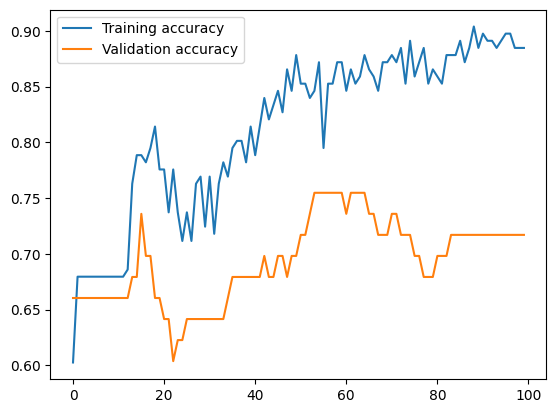

In [132]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['accuracy']],label = 'Training accuracy')
plt.plot(history_df.loc[:,['val_accuracy']],label = "Validation accuracy")
plt.legend()
plt.show()

In [133]:
y_pred = model.predict(X_test)
data = S_Scaler.transform(X_test.iloc[[2]])
print(model.predict(data))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.99994427]]


In [134]:
print(y_pred)

[[0.4225115 ]
 [0.27394062]
 [0.04900213]
 [0.04180516]
 [0.21836829]
 [0.23993509]
 [0.13426527]
 [0.9911905 ]
 [0.98248196]
 [0.07624419]
 [0.22329627]
 [0.90747374]
 [0.16013898]
 [0.18078391]
 [0.23059653]
 [0.96344835]
 [0.05258738]
 [0.1321262 ]
 [0.13695541]
 [0.18730785]
 [0.99588674]
 [0.31830665]
 [0.99715126]
 [0.1216683 ]
 [0.258855  ]
 [0.13945949]
 [0.24822411]
 [0.93484855]
 [0.28761968]
 [0.11571016]
 [0.0459974 ]
 [0.09661584]
 [0.9871625 ]
 [0.38254184]
 [0.14072642]
 [0.15074927]
 [0.11059347]
 [0.95713377]
 [0.64512503]
 [0.9537108 ]
 [0.2804564 ]
 [0.48175657]
 [0.28480425]
 [0.17424984]
 [0.06601223]
 [0.370137  ]
 [0.09766191]
 [0.08807382]
 [0.08912764]
 [0.451956  ]
 [0.24331285]
 [0.5824323 ]
 [0.49072483]
 [0.8672897 ]
 [0.51628375]
 [0.06298491]
 [0.14499688]
 [0.29884827]
 [0.22904502]
 [0.9809767 ]
 [0.08866229]
 [0.9562408 ]
 [0.2007281 ]
 [0.05591662]
 [0.08923005]
 [0.99986595]
 [0.8525284 ]
 [0.97701603]
 [0.64338183]
 [0.93836296]
 [0.16644882]
 [0.80

In [135]:
y_pred = (y_pred>0.45)


In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        62
           1       0.79      0.82      0.81        28

    accuracy                           0.88        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.88      0.88      0.88        90



In [137]:
model.save("heart_failure_model.h5")